In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from tensorflow.keras import layers


In [18]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset = train.flow_from_directory("training",
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary'
)
validation_dataset =train.flow_from_directory("validation",
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 322 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid')                       
                                   ])

In [21]:
model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
tensor=TensorBoard(
    log_dir="tboard",
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    
)


In [22]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 30,
                     validation_data=validation_dataset,
                      callbacks= [tensor],verbose=2)

Epoch 1/30


In [ ]:
loss, accuracy = model.evaluate(train_dataset, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_dataset, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

3/3 [==============================] - 2s 680ms/step - loss: 0.0307 - accuracy: 0.9811
Validation: accuracy = 0.981132  ;  loss_v = 0.030664
Test: accuracy = 0.996894  ;  loss = 0.008553


In [ ]:
%load_ext tensorboard

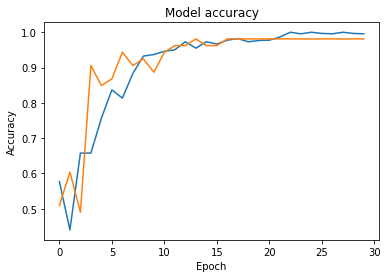

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

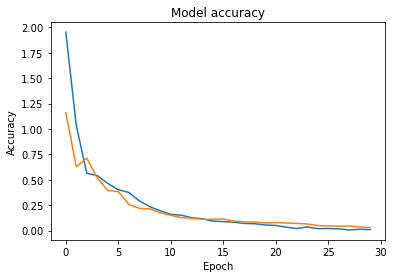

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
%tensorboard --logdir=tboard/ --host localhost --port 8888

Reusing TensorBoard on port 8888 (pid 14104), started 0:40:05 ago. (Use '!kill 14104' to kill it.)

In [ ]:
# model.summary()
# model.save('cnn_model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
# img_file = './model_arch.png'

# tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
#%pip install pydot

In [ ]:
#%pip install graphviz